# Import modules and data

In [56]:
#standard imports
import pandas as pd
import numpy as np
#data visualization imports 
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor 
#tensorflow imports
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
#statsmodel import
import statsmodels.api as sm

In [2]:
#import data
df = pd.read_csv('data/life_expectancy_data.csv')
#inspect first few rows of dataframe
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data cleaning

In [3]:
#call .info
df.info()
#print statement calling missing values
print(f'Dataset contains {df.isna().sum().sum()} missing data entries')
#print statement calling duplicated values
print(f'Dataset contains {df.duplicated().sum()} duplicated data entries')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
#calling lambda function to remove unneccesary spaces with rename
df = df.rename(columns=lambda x: x.strip())
#inspect info to ensure results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
#define dictionary of imputing methods for for loop
impute_methods = {np.dtype('float64'): lambda col: col.fillna(col.mean()),
                  np.dtype('int64'): lambda col: col.fillna(col.median()),
                  np.dtype('O'): lambda col: col.fillna(col.mode().iloc[0])}
#outer loop that loops through each column in dataframe
for col in df.columns:
    data_type = df[col].dtype  # getting data type for each column
    #inner loop through impute methods to see if present
    if data_type in impute_methods:
        impute_func = impute_methods[data_type] #get corresponding data type
        df[col] = impute_func(df[col]) #apply impute method

#call missing values to ensure loop was successful
print(f'Data contains {df.isna().sum().sum()} missing data points')

Data contains 0 missing data points


In [6]:
#defining fucntion to format column names
def format_column_name(df):
    """Make all column names lower case with underscores
       Args: Pandas DataFrame
       Returns: new DataFrame with formated column names"""
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df
#calling function for our dataframe
df = format_column_name(df)
#calling info on new df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

# Exploratory data analysis

How has the average life expectancy changed since the turn of the century? As you can see from the visual below it has rise consistently since the year 2000.

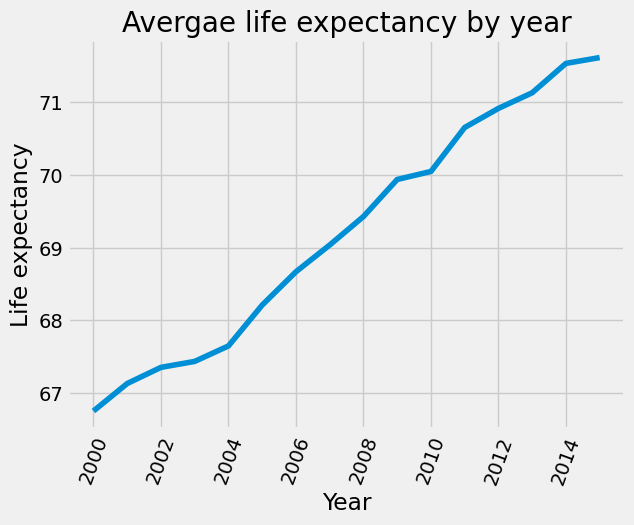

In [7]:
#grouping year by average life expectancy
avg_life_ex = df.groupby('year')['life_expectancy'].mean()
#choosing plot style
plt.style.use('fivethirtyeight')
#call line plot of average life expectancy by year 
plt.plot(avg_life_ex.index, avg_life_ex.values)
#call plot title
plt.title('Avergae life expectancy by year')
#call axis title
plt.xlabel('Year')
plt.ylabel('Life expectancy')
#rotate x labels 
plt.xticks(rotation=70)
#show plot
plt.show()

The same can be said for infant deaths and deaths under 5 years old. The two visuals below show a steady and consistent decline over the last decade

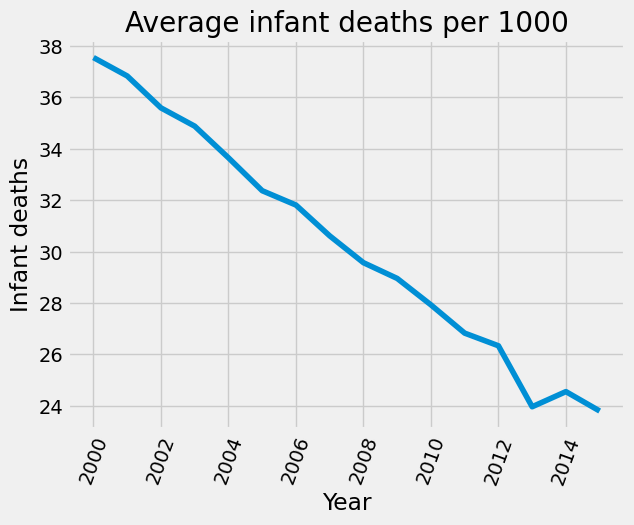

In [8]:
#grouping average infant deaths by year
avg_inf_ded = df.groupby('year')['infant_deaths'].mean()
#calling line plot of average infant deaths by year
plt.plot(avg_inf_ded.index, avg_inf_ded.values)
#calling plot title
plt.title('Average infant deaths per 1000')
#calling axis title
plt.xlabel('Year')
plt.ylabel('Infant deaths')
#rotate x labels
plt.xticks(rotation=70)
#show plot
plt.show()

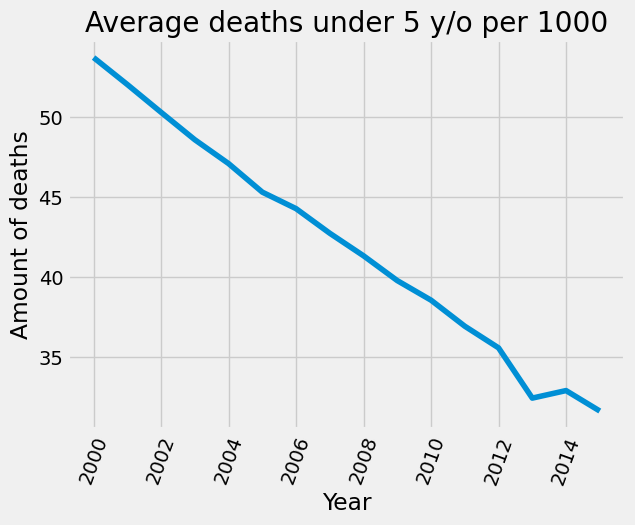

In [9]:
#grouping average deaths under five by year
under5_ded = df.groupby('year')['under-five_deaths'].mean()
#calling line plot with average under five deaths by year
plt.plot(under5_ded.index, under5_ded.values)
#calling plot title
plt.title('Average deaths under 5 y/o per 1000')
#calling axis titles
plt.xlabel('Year')
plt.ylabel('Amount of deaths')
#rotate x labels
plt.xticks(rotation=70)
#show plot
plt.show()

<b>What about young adults?
 
While the deaths of those between 16 and 30 years old has gone down, 2004 and 2008 did have some big spikes and it starts to spike again showing an increase in 2014.

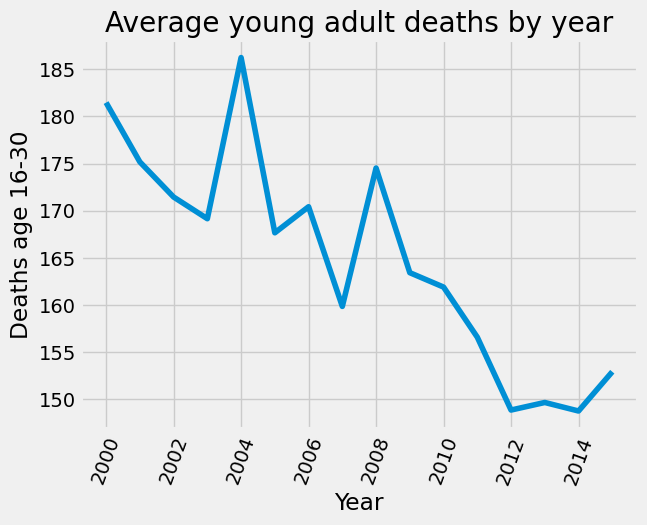

In [10]:
#grouping average adult mortailty by year
adultmor = df.groupby('year')['adult_mortality'].mean()
#calling line plot with average adult mortality by year
plt.plot(adultmor.index, adultmor.values)
#calling plot title
plt.title('Average young adult deaths by year')
#calling axis titles
plt.xlabel('Year')
plt.ylabel('Deaths age 16-30')
#rotate x labels
plt.xticks(rotation=70)
#show plot
plt.show()

Does alcohol consumption play a role at all? Well despite the overall decrease in death and increase in life expectancy, alcohol consumption has remained steady for the majority of the decade. Around 2011 there was a pretty significant dip followed by a huge increase in 2014.

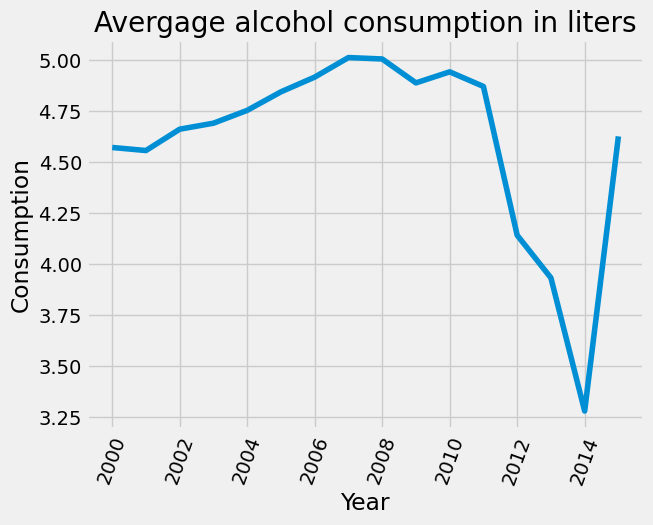

In [11]:
#groupby alcohol average by year 
alc_year=df.groupby('year')['alcohol'].mean()
#calling line plot for average alcohol by year
plt.plot(alc_year.index, alc_year.values)
#calling plot title 
plt.title('Avergage alcohol consumption in liters')
#calling axis title
plt.xlabel('Year')
plt.ylabel('Consumption')
#rotate x labels
plt.xticks(rotation=70)
#show plot
plt.show()

How does the average BMI over the decade look in all of this? Despite the overall positives listed above, the average BMI has increased consistently since 2005.

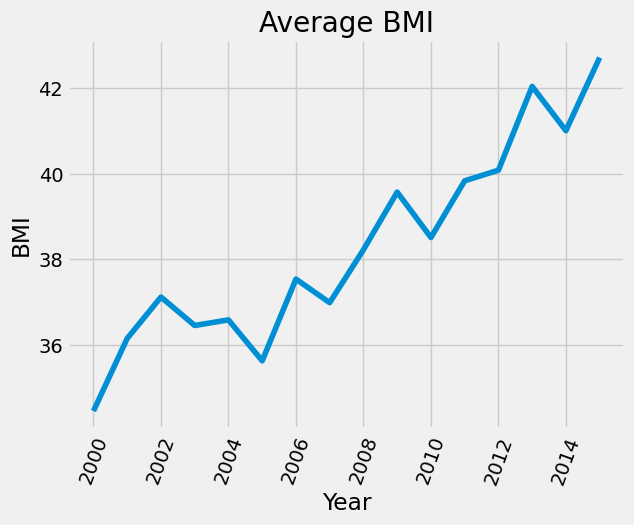

In [12]:
#grouping average bmi by year
bmi_avg=df.groupby('year')['bmi'].mean()
#call line plot with average bmi by year
plt.plot(bmi_avg.index, bmi_avg.values)
#call title
plt.title('Average BMI')
#call axis titles
plt.xlabel('Year')
plt.ylabel('BMI')
#rotate x labels
plt.xticks(rotation=70)
#show plot
plt.show()

Below we used a scatter plot with a regression to see if there was a correlation between life expectancy and GDP. There appears to be a weak relationship between life expectancy and GDP.

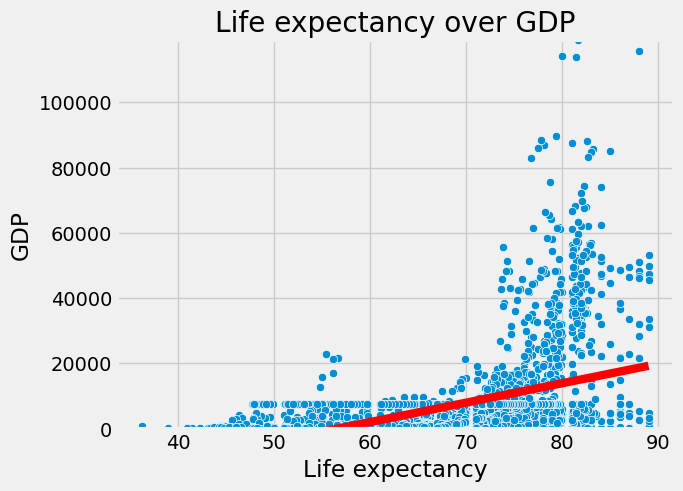

In [13]:
#call scatter plot with regression line for life expectancy and gdp
sns.scatterplot(x='life_expectancy', y='gdp', data=df)
sns.regplot(x='life_expectancy', y='gdp', data=df, scatter=False, ci=None, line_kws={'color': 'red', 'label': 'Correlation Line'}, order=1, truncate=True)
#set y label limit
plt.ylim(0, max(df['gdp']))
#call titles
plt.title('Life expectancy over GDP')
#call axis titles
plt.xlabel('Life expectancy')
plt.ylabel('GDP')
#show plot
plt.show()

Does schooling effect life expectancy? The regression line on the scatter plot shows a very strong relationship with all the data points being around the regression line (red) with the exception of probable outliers. Will explore this further in statistical analysis.

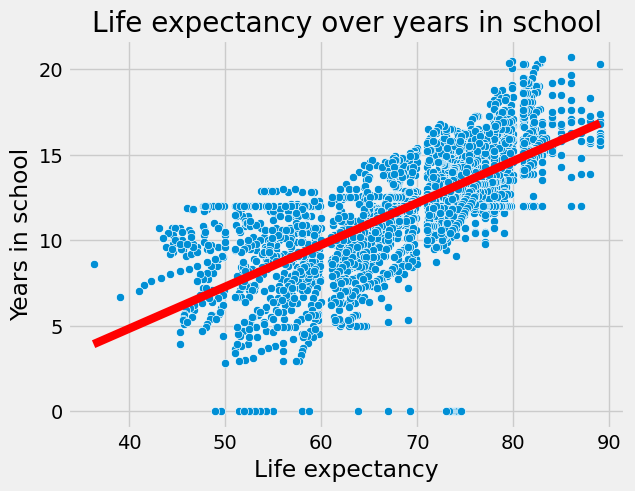

In [14]:
#call scattertplot with regression line for schooling and life expectancy 
sns.scatterplot(x='life_expectancy', y='schooling', data=df)
sns.regplot(x='life_expectancy', y='schooling', data=df, scatter=False, ci=None, line_kws={'color': 'red', 'label': 'Correlation Line'}, order=1, truncate=True)
#call title
plt.title('Life expectancy over years in school')
#call axis labels
plt.xlabel('Life expectancy')
plt.ylabel('Years in school')
#show plot
plt.show()

Does alcohol consumption impact life expectancy? The regression line on the scatter plot shows a possible relationship, however since most of the data points aren't around line itself, more investigation is required to draw a possible conclusion.

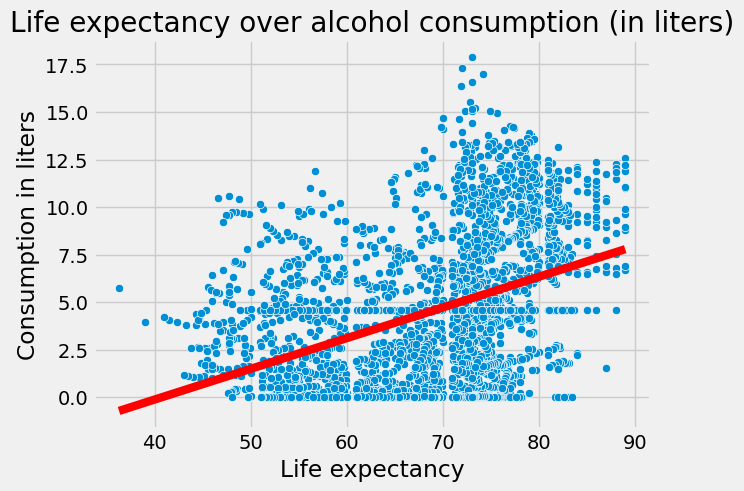

In [15]:
#call scatter plot with life expectancy over alcohol consumption
sns.scatterplot(x='life_expectancy', y='alcohol', data=df)
sns.regplot(x='life_expectancy', y='alcohol', data=df, scatter=False, ci=None, line_kws={'color': 'red', 'label': 'Correlation Line'}, order=1, truncate=True)
#call title
plt.title('Life expectancy over alcohol consumption (in liters)')
#call axis labels
plt.xlabel('Life expectancy')
plt.ylabel('Consumption in liters')
#show plot
plt.show()

The data points in the scatter plot below are distributed similar to before, the polio vaccine might have a positive relationship, but it likely did not have a negative one

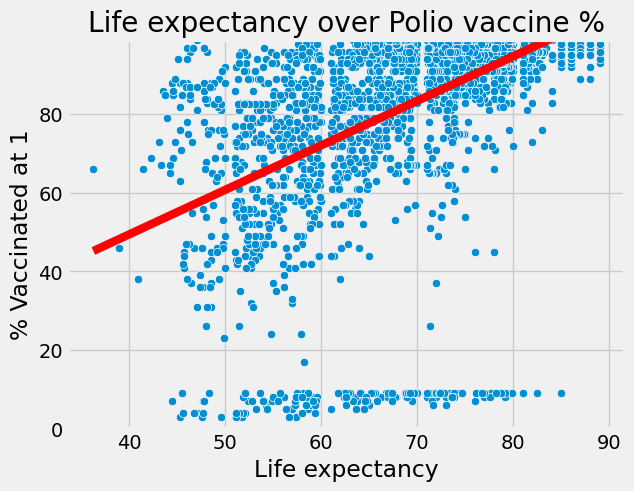

In [16]:
#calling scatter plot with regression line for polio vaccine and life expectancy
sns.scatterplot(x='life_expectancy', y='polio', data=df)
sns.regplot(x='life_expectancy', y='polio', data=df, scatter=False, ci=None, line_kws={'color': 'red', 'label': 'Correlation Line'}, order=1, truncate=True)
#set y label limit
plt.ylim(0, max(df['polio']))
#call title
plt.title('Life expectancy over Polio vaccine %')
#call axis label
plt.xlabel("Life expectancy")
plt.ylabel('% Vaccinated at 1')
#show plot
plt.show()

How about the Hepatitis B Vaccine? Well there seems to be a weak to no relationship between the Hepatitis B vaccine and life expectancy. While one side the regression line is populated (upper) the lower part is widely distributed.

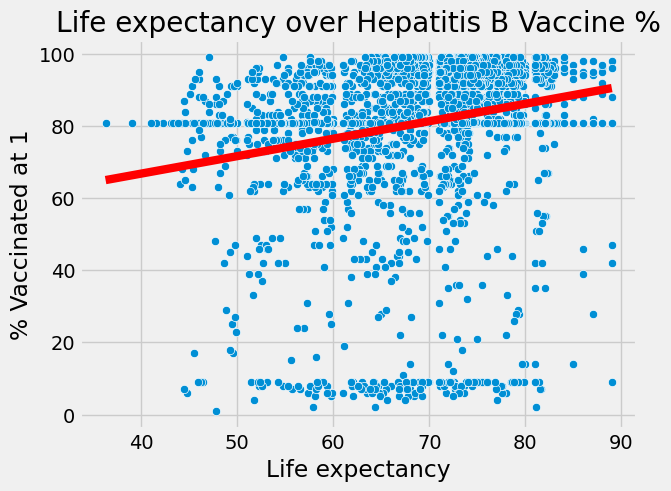

In [19]:
#call scatter plot with life expectancy over hepatitis b vaccine
sns.scatterplot(x='life_expectancy', y='hepatitis_b', data=df)
sns.regplot(x='life_expectancy', y='hepatitis_b', data=df, scatter=False, color='red', ci=None, order=1, truncate=True)
#call title
plt.title('Life expectancy over Hepatitis B Vaccine %')
#call axis label
plt.xlabel('Life expectancy')
plt.ylabel('% Vaccinated at 1')
#show plot
plt.show()


Do more densely populated areas have higher or lower life expectancies? The regression line on the scatter plot below is flat, so there appears to be no relationship between population and life expectancy.

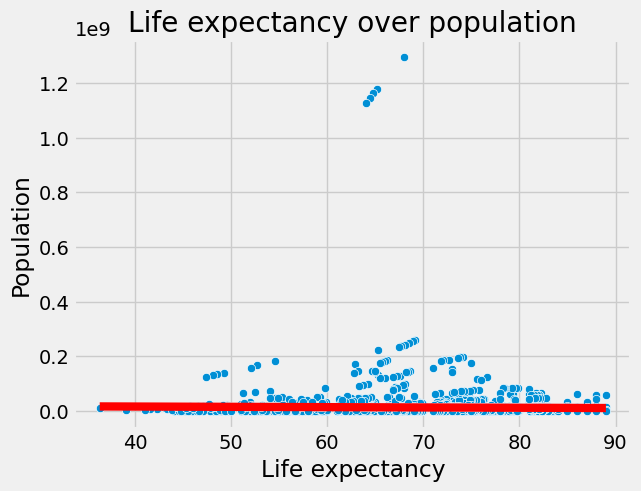

In [18]:
#call scatter plot with life expectancy and population with regression line
sns.scatterplot(x='life_expectancy', y='population', data=df)
sns.regplot(x='life_expectancy', y='population', data=df, scatter=False, color='red', ci=None, order=1, truncate=True)
#call title
plt.title('Life expectancy over population')
#call axis labels
plt.xlabel('Life expectancy')
plt.ylabel('Population')
#show plot
plt.show()

It appears infant deaths also have no relationship to life expectancy due to how flat the regression line in on the scatter plot below.

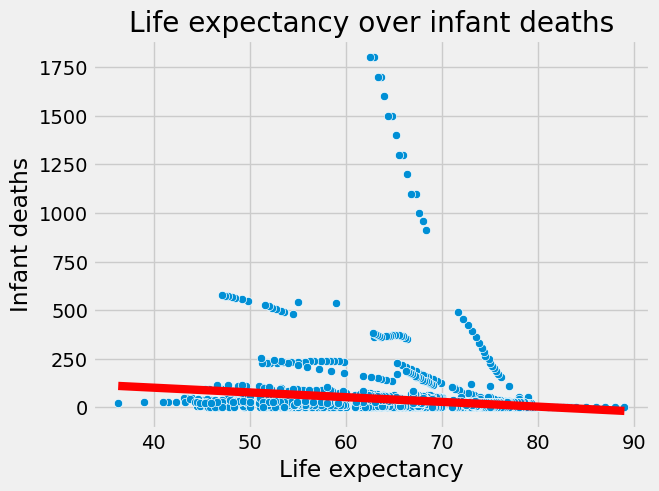

In [20]:
#call scatter plot with life expectancy over infant deaths
sns.scatterplot(x='life_expectancy', y='infant_deaths', data=df)
sns.regplot(x='life_expectancy', y='infant_deaths', data=df, scatter=False, color='red', ci=None, order=1, truncate=True)
#call title
plt.title('Life expectancy over infant deaths')
#call axis labels 
plt.xlabel('Life expectancy')
plt.ylabel('Infant deaths')
#show plot
plt.show()

Does the rate of adult mortality (ages 16-30) have an impact on life expectancy? Assuming all the data points on the lower part of the scatter plot are outliers then yes, but we will inspect this during statistical analysis. 

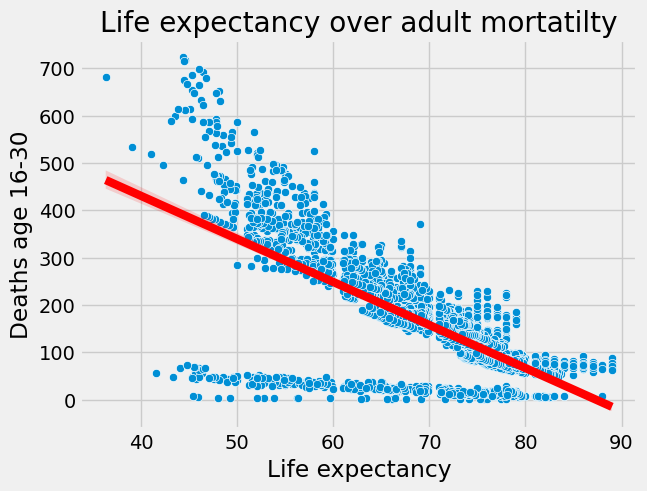

In [21]:
#call scatter plot with life expectancy over adult mortality
sns.scatterplot(x='life_expectancy', y='adult_mortality', data=df)
sns.regplot(x='life_expectancy', y='adult_mortality', data=df, scatter=False, color='red')
#call title
plt.title('Life expectancy over adult mortatilty')
#call axis label
plt.xlabel('Life expectancy')
plt.ylabel('Deaths age 16-30')
#show plot
plt.show()

It also appears deaths under five has no relationship to life expectancy due to how flat the regression line is on the scatter plot below.

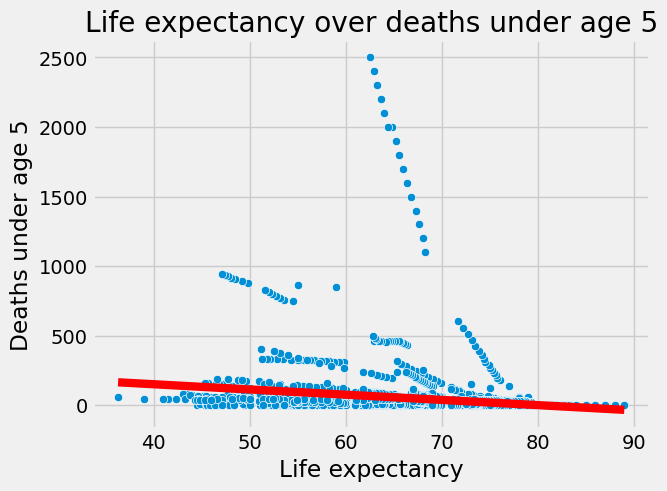

In [22]:
#call scatter plot with life expectancy over under 5 deaths
sns.scatterplot(x='life_expectancy', y='under-five_deaths', data=df)
sns.regplot(x='life_expectancy', y='under-five_deaths', data=df, scatter=False, color='red')
#call plot title
plt.title('Life expectancy over deaths under age 5')
#call axis label
plt.xlabel('Life expectancy')
plt.ylabel('Deaths under age 5')
#show plot
plt.show()

Should countries with a life expectancy lower than 65 spend more money on health care? There seems to be no relationship, but will revisit in statistical analysis to make sure.

In [23]:
#query data with life expectancy less than 65
dead65 = df[df['life_expectancy']<65]

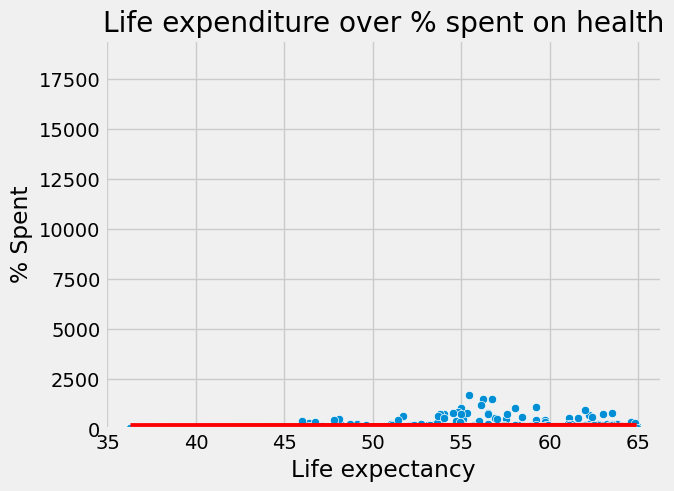

In [24]:
#call scatter plot with life expectancy over percentage expenditure
sns.scatterplot(x='life_expectancy', y='percentage_expenditure', data=dead65)
sns.regplot(x='life_expectancy', y='percentage_expenditure', data=dead65, scatter=False, color='red')
#set y axis limit
plt.ylim(0, max(df['percentage_expenditure']))
#call plot title
plt.title('Life expenditure over % spent on health')
#call axis label
plt.xlabel('Life expectancy')
plt.ylabel('% Spent')
#show plot
plt.show()

Does BMI play a factor in life expectancy? There appears to be a moderate relationship between life expectancy and BMI, will investigate further during statistical analysis. 

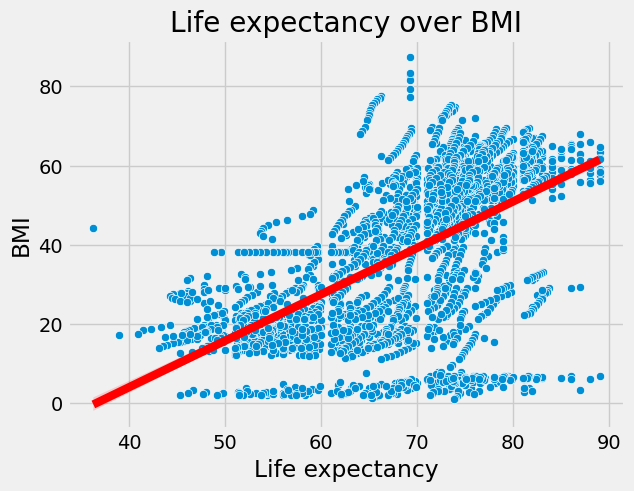

In [25]:
#call scatterplot with regression line with BMI over life expectancy
sns.scatterplot(x='life_expectancy', y='bmi', data=df)
sns.regplot(x='life_expectancy', y='bmi', data=df, scatter=False, color='red')
#call title
plt.title('Life expectancy over BMI')
#call axis labels
plt.xlabel('Life expectancy')
plt.ylabel('BMI')
#show plot
plt.show()

Below we called the describe function to call various metrics to be used to reference later.

In [26]:
#call describe function
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Predictive models 

## PCA

We will be using a principal component analysis (PCA) to reduce our dimensions of features for our neural network to perform better.

In [27]:
#define x and y variable
X = df.drop(columns=['life_expectancy', 'country', 'status']) #removing y variable and object columns
y = df['life_expectancy']
#instantiate train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
#calling standard scaler
scaler = StandardScaler()
#scale X data 
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)
#instantiate pca
pca = PCA()
#fit scaled training data 
pca.fit(X_train_sca)

PCA()

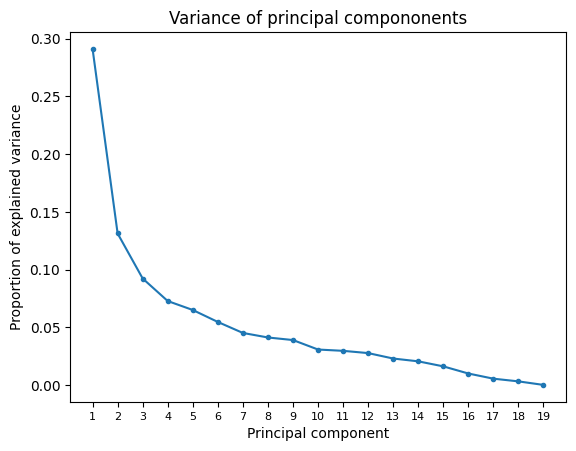

In [29]:
#reset style to default
plt.style.use('default')
#visual variance for each component 
plt.plot(range(1,20), pca.explained_variance_ratio_, marker='.' )
#call xticks 
plt.xticks(ticks=range(1,20), fontsize=8)
#call title
plt.title('Variance of principal compononents')
#call axis labels
plt.xlabel('Principal component')
plt.ylabel('Proportion of explained variance')
#show plot
plt.show()

It appears our ideal principal component parameter is 4 since thats where the slope ends for variance.

In [30]:
#instante new pca with new parameter 
pca4 = PCA(n_components=4)
#fit training data
pca4.fit(X_train_sca)
#transform X data
X_train_pro = pca4.transform(X_train_sca)
X_test_pro = pca4.transform(X_test_sca)
#inspecting new shape of data w/ print statements
print(f'X train processed shape: {X_train_pro.shape[1]}')
print(f'X train unprocessed shape: {X_train.shape[1]}')

X train processed shape: 4
X train unprocessed shape: 19


We have successfully transformed out features for the neural network.

## Neural network model 


### Model A


In [31]:
#instantiate instance of model
model = Sequential()
#adding first layer 
model.add(Dense(32, input_dim=X_train_pro.shape[1], activation='relu'))
#adding second layer
model.add(Dense(16, activation='relu'))
#adding output layer
model.add(Dense(1, activation='linear'))
#compile model for regression
model.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(),
                                                     metrics.RootMeanSquaredError()])
#fitting data to model
history = model.fit(X_train_pro, y_train,
                   validation_data=(X_test_pro, y_test),
                   epochs=100,
                   verbose=0)

In [32]:
#create function to get metrics for model
def reg_metrics(model, X_test, y_test):
    """Returns RMSE, MAE, and R2 of Regression Model"""
    y_pred = model.predict(X_test_pro)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    mae=mean_absolute_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2:{r2}')
#call function to get metrics
reg_metrics(model, X_test_pro, y_test)

23/23 [==============================] - 0s 3ms/step
RMSE:4.172029673078963
MAE:3.0895837346188952
R2:0.8066710292980296


Our Root Mean Squared Error is about 4.10, meaning our model is predicting within 4.10 years. Mean Squared Error is a similar idea except it works better with outliers, meaning it can predict within around 3 years. R2 scores are typically 0 and 1 and measures how well are model is fit and interpreting the variance in the target variable (for us Life Expectancy) and the model seems to be doing well at 0.813.

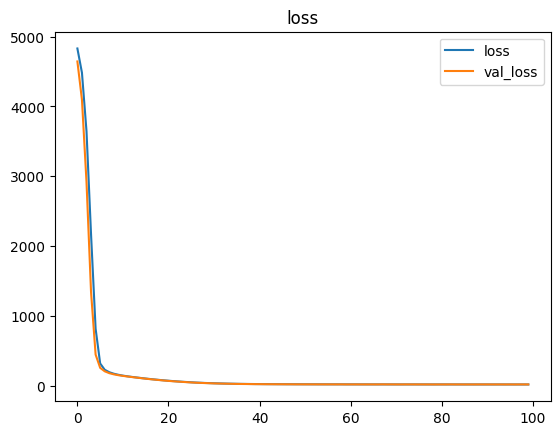

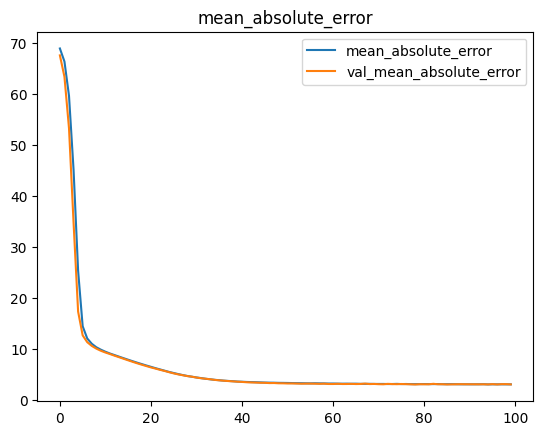

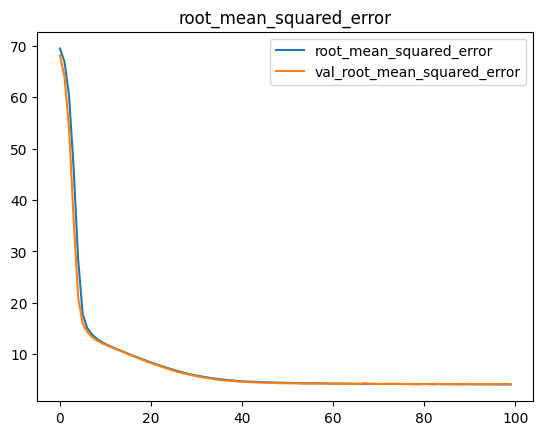

In [33]:
#creating function to plot metrics for model
def plot_history(history):
    """FUNCTION THAT PLOTS HISTORY OF NEURAL NETWORK"""
    #defining metrics
    metrics= history.history.keys()
    #call for loop to go through history
    for metric in metrics: #using if statement to specify how want metrics ploted
        if not 'val' in metric:
          plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
          plt.legend()
          plt.title(f'{metric}')
          plt.show()
#call funtion to plot metrics for first model
plot_history(history)

In the loss, mae, and rmse we see the lines begin to drop after around 20 epochs. While we do want the lines to converge as they did, the dropping value might be a sign of over-fitting, meaning our model might be "reading too much into certain things" and wouldn't be as useful with newer data. To combat this we will redo out model with early stopping to stop the model at the epochs where the lines start dropping (around 8).

### Model 2 (w/ early stopping)

In [34]:
#define early stopping callback
early_stopping = EarlyStopping(
                 monitor='val_loss', #selecting metric
                 patience=8,         #epoch after no improvement
                 restore_best_weights=True) #restore model with best validation


#instantiate instance of model
model2 = Sequential()
#adding first layer 
model2.add(Dense(32, input_dim=X_train_pro.shape[1], activation='relu'))
#adding second layer
model2.add(Dense(16, activation='relu'))
#adding output layer
model2.add(Dense(1, activation='linear'))
#compile model for regression
model2.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(),
                                                     metrics.RootMeanSquaredError()])
#fitting data to model
history = model2.fit(X_train_pro, y_train,
                   validation_data=(X_test_pro, y_test),
                   epochs=100,
                   verbose=0,
                   callbacks=[early_stopping])


In [35]:
#call function to get metrics
reg_metrics(model2, X_test_pro, y_test)

23/23 [==============================] - 0s 3ms/step
RMSE:4.146019105522567
MAE:3.0587698204301734
R2:0.8090741382042125


While our RMSE score did go down indicating less error, the MAE went up and that score accounts for outliers better. Our R2 score also went down by about .10.

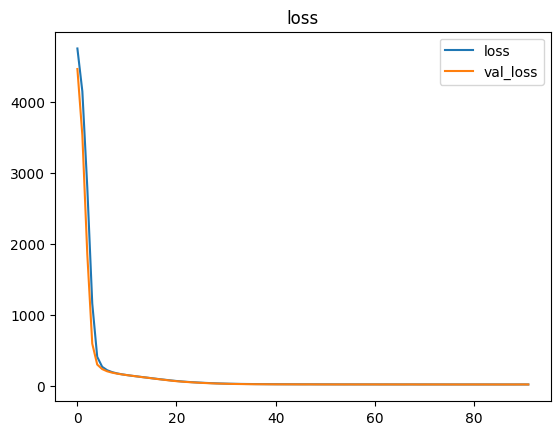

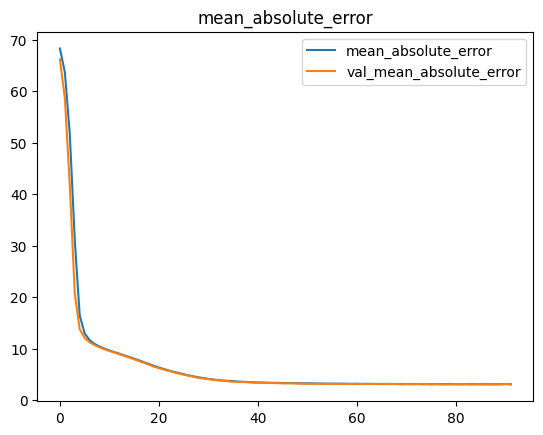

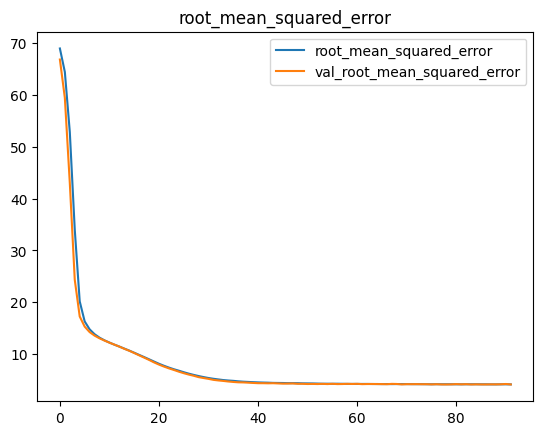

In [36]:
#call function to plot scores
plot_history(history)

It seems the second version of the model has more or less the same issues as before. Since the early stopping epoch was eye balled we will try one more value greater than 8. Since the values tend to be dropping around 15, we will use that next

### Model 3 (w/ early stopping)

In [37]:
#define early stopping callback
early_stopping=EarlyStopping(
               monitor='val_loss', #selecting metric
                 patience=15,         #epoch after no improvement
                 restore_best_weights=True) #restore model with best validation
#instantiate third model
model3 = Sequential()
#adding first layer
model3.add(Dense(32, input_dim=X_train_pro.shape[1], activation='relu'))
#adding second layer 
model3.add(Dense(16, activation='relu'))
#adding third layer
model3.add(Dense(1, activation='linear'))
#compile model for regression
model3.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(),
                                                     metrics.RootMeanSquaredError()])
#fitting data to model 
history = model3.fit(X_train_pro, y_train,
                    validation_data=(X_test_pro, y_test),
                    epochs=100,
                    verbose=0,
                    callbacks=[early_stopping])

In [38]:
#call function to get metrics
reg_metrics(model3, X_test_pro, y_test)

23/23 [==============================] - 0s 3ms/step
RMSE:4.197285272557871
MAE:3.137176935717695
R2:0.8043232906237101


The models RMSE score and MAE have both gone up, meaning the error in predictions have as well. In addition, the R2 score has decreased meaning less the model isn't seeing patterns as well. 

Out of the three models the first one performed best based on these metrics. While adjusting parameters further is an option we will be moving onto a different type of model

## Linear Regression

### Preprocessing data


#### Re-inspect data

In [39]:
#inspect missing and duplicate values
print(f'Data contains {df.isna().sum().sum()} missing values')
print(f'Data contains {df.duplicated().sum()} duplicate values')
#inspect info
df.info()

Data contains 0 missing values
Data contains 0 duplicate values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under-five_deaths 

#### Inspecting linear and non-linear relationships

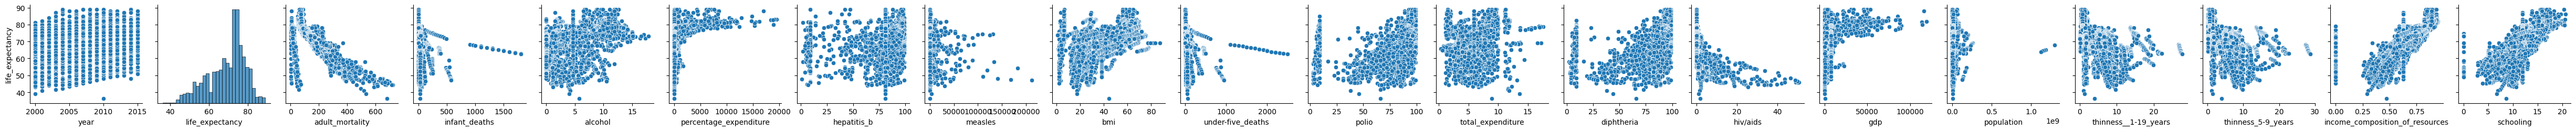

In [40]:
#call pairplot to inspect relationships
sns.pairplot(df, y_vars='life_expectancy')

Non linear relationships include
    
- year
- infant_deaths
- percentage_expenditure
- hepatitis_b
- measles
- under-five_deaths
- polio
- total_expenditures
- gdp
- population




In [41]:
#create x and y variables 
y=df['life_expectancy'].copy()
X=df.drop(columns=['year', 'infant_deaths', 'percentage_expenditure', 'hepatitis_b', 'measles', 'under-five_deaths', 'polio', 'total_expenditure', 'gdp', 'population', 'life_expectancy']).copy()
#initiate train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#inspect result
X_train.head()

,country,status,adult_mortality,alcohol,bmi,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2737,Ukraine,Developing,273.0,9.46,57.6,9.0,0.4,2.5,2.6,0.730000,14.900000
789,Ecuador,Developing,127.0,3.92,52.1,87.0,0.1,1.3,1.2,0.717000,13.300000
707,Democratic People's Republic of Korea,Developing,146.0,3.35,31.8,93.0,0.1,5.0,5.0,0.627551,11.992793
424,Burundi,Developing,355.0,4.54,14.8,99.0,3.4,8.0,8.0,0.309000,7.200000
69,Antigua and Barbuda,Developing,138.0,7.84,44.4,98.0,0.1,3.3,3.3,0.783000,14.100000


#### Pipeline preprocessor

In [42]:
#call selector for object type
cat_selector=make_column_selector(dtype_include='object')
#save list of object column names
cat_cols = cat_selector(X_train)
cat_cols

['country', 'status']

In [43]:
#call selector for number type
num_selector=make_column_selector(dtype_include='number')
#save list of number column names
num_cols = num_selector(X_train)
num_cols

['adult_mortality',
 'alcohol',
 'bmi',
 'diphtheria',
 'hiv/aids',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling']

In [44]:
#call pipeline for object features
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore',
                                       sparse=False))
#call pipeline for number features
num_pipe = make_pipeline(SimpleImputer(strategy='mean')) #while we contain no missing values to impute, we are using the pipelines for convenience


In [45]:
#calling pipelines as preprocessor
preprocessor = make_column_transformer((cat_pipe, cat_cols), (num_pipe, num_cols), remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['country', 'status']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult_mortality', 'alcohol', 'bmi',
                                  'diphtheria', 'hiv/aids',
                                  'thinness__1-19_years', 'thinness_5-9_years',
                                  'income_composition_of_resources',
                                  'schooling'])])

#### Transforming data

In [46]:
#fit training data to preprocessor
preprocessor.fit(X_train)
#inspect fitted data in dataframe while transforming it
pd.DataFrame(preprocessor.transform(X_train).round(3))

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,273.0,9.46,57.6,9.0,0.4,2.5,2.6,0.730,14.900
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,127.0,3.92,52.1,87.0,0.1,1.3,1.2,0.717,13.300
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,146.0,3.35,31.8,93.0,0.1,5.0,5.0,0.628,11.993
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,355.0,4.54,14.8,99.0,3.4,8.0,8.0,0.309,7.200
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,138.0,7.84,44.4,98.0,0.1,3.3,3.3,0.783,14.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,59.0,6.91,68.0,96.0,0.1,0.8,0.7,0.826,14.800
2199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,287.0,3.21,23.1,83.0,5.9,8.0,7.9,0.405,8.900
2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,266.0,6.08,4.7,63.0,2.7,4.2,4.2,0.458,8.400
2201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,72.0,9.30,57.0,96.0,0.1,0.5,0.5,0.841,15.400


As you can see, while preprocessing the data we have lost all information about our column features. The following steps will rectify this.

In [47]:
#call empty list to hold feature names
final_features = []
#calling names steps in onehotencoder
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']

In [48]:
#retrieve category feature names
cat_features = ohe_step.get_feature_names_out(cat_cols)
#adding feature names to list
final_features.extend(cat_features)
final_features

['country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Antigua and Barbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahamas',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Benin',
 'country_Bhutan',
 'country_Bolivia (Plurinational State of)',
 'country_Bosnia and Herzegovina',
 'country_Botswana',
 'country_Brazil',
 'country_Brunei Darussalam',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cabo Verde',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo',
 'country_Cook Islands',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czechia',
 "country_Côte d'Ivoire",

In [49]:
#adding number column feature names
final_features.extend(num_cols)
final_features

['country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Antigua and Barbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahamas',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Benin',
 'country_Bhutan',
 'country_Bolivia (Plurinational State of)',
 'country_Bosnia and Herzegovina',
 'country_Botswana',
 'country_Brazil',
 'country_Brunei Darussalam',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cabo Verde',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo',
 'country_Cook Islands',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czechia',
 "country_Côte d'Ivoire",

Now that we have a list with all the feature names, we can create a new dataframe that will have all the feature names listed

In [51]:
#transforming x_train data
X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns=final_features, index=X_train.index)
#inspecting new datafraME
X_train_df.head()



,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,...,status_Developing,adult_mortality,alcohol,bmi,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,273.0,9.46,57.6,9.0,0.4,2.5,2.6,0.730000,14.900000
789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,127.0,3.92,52.1,87.0,0.1,1.3,1.2,0.717000,13.300000
707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,146.0,3.35,31.8,93.0,0.1,5.0,5.0,0.627551,11.992793
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,355.0,4.54,14.8,99.0,3.4,8.0,8.0,0.309000,7.200000
69,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,138.0,7.84,44.4,98.0,0.1,3.3,3.3,0.783000,14.100000


In [53]:
#transforming X_test data
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
#insect new dataframe
X_test_df.head()

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,...,status_Developing,adult_mortality,alcohol,bmi,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,123.0,0.97,48.5,8.0,0.1,6.4,6.3,0.636,11.4
650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,113.0,11.83,58.1,96.0,0.1,1.8,1.8,0.783,13.9
1740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,125.0,4.98,57.2,92.0,0.1,2.1,2.2,0.762,13.6
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,1.57,62.9,98.0,0.1,6.1,6.0,0.820,14.5
1377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,428.0,1.51,14.4,82.0,18.1,9.2,9.1,0.448,8.4


#### Adding 'constants' to data

You can think of adding constants just means a starting point to our correlations. If you picture a scatter plot with a trend line, we want the line to start with the data and not the plots origin (0, 0). This will allow our model to make more accurate predictions

In [54]:
#calling sm.add_constant for data
X_train_df = sm.add_constant(X_train_df, has_constant='add', prepend=False)
X_test_df = sm.add_constant(X_test_df, has_constant='add', prepend=False)
#disply dataframes
display(X_train_df.head(2), X_test_df.head(2))

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,...,adult_mortality,alcohol,bmi,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,const
2737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273.0,9.46,57.6,9.0,0.4,2.5,2.6,0.730,14.9,1.0
789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.0,3.92,52.1,87.0,0.1,1.3,1.2,0.717,13.3,1.0


,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,...,adult_mortality,alcohol,bmi,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,const
2546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.0,0.97,48.5,8.0,0.1,6.4,6.3,0.636,11.4,1.0
650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,113.0,11.83,58.1,96.0,0.1,1.8,1.8,0.783,13.9,1.0


#### Instantiate instance of model

In [55]:
#calling instance of model
model=sm.OLS(y_train, X_train_df, hasconst=True)
#fit training data
result = model.fit()
#calling model performace metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     199.8
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:10:14   Log-Likelihood:                -4747.7
No. Observations:                2203   AIC:                             9893.
Df Residuals:                    2004   BIC:                         1.103e+04
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
country_Afghanistan                                             -6.8899      0.686    -10.039      0.000      -8.236      -5.544
country_Albania                                                  5.9814      0.608      9.835      0.000       4.789       7.174
country_Algeria                                                  3.8222      0.644      5.932      0.000       2.559       5.086
country_Angola                                                 -14.4430      0.661    -21.856      0.000     -15.739     -13.147
country_Antigua and Barbuda                                     10.1411      0.649     15.627      0.000       8.868      11.414
country_Argentina                                                3.4240      0.676      5.064      0.000       2.098       4.750
country_Armenia                                                  4.6593      0.739      6.309      0.000       3.211       6.108
country_Australia                                                0.0990      0.618      0.160      0.873      -1.113       1.311
country_Austria                                                  3.5088      0.627      5.594      0.000       2.279       4.739
country_Azerbaijan                                               1.9246      0.619      3.111      0.002       0.711       3.138
country_Bahamas                                                  5.8062      0.730      7.948      0.000       4.374       7.239
country_Bahrain                                                  4.5390      0.706      6.426      0.000       3.154       5.924
country_Bangladesh                                               2.6024      0.711      3.659      0.000       1.208       3.997
country_Barbados                                                 3.7926      0.725      5.231      0.000       2.371       5.214
country_Belarus                                                  0.7059      0.808      0.873      0.383      -0.879       2.291
country_Belgium                                                  2.2955      0.653      3.518      0.000       1.016       3.575
country_Belize                                                   0.4037      0.702      0.575      0.565      -0.972       1.779
country_Benin                                                   -7.5664      0.631    -11.999      0.000      -8.803      -6.330
country_Bhutan                                                  -0.2618      0.786     -0.333      0.739      -1.804       1.280
country_Bolivia (Plurinational State of)                        -1.4071      0.681     -2.066      0.039      -2.743      -0.071
country_Bosnia and Herzegovina                                   7.7672      0.676     11.489      0.000       6.441

Breaking down the metrics in our summary. R-Squared (R2) is how well our model is at seeing the changes in our X in relation to y. It's very close to one which is on the higher end of scores the Durban-Watson score is almost two, indicating no autocorelation, meaning all data points are independent of each other. 



### Random forest regression

In [59]:
#call train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#call instance of model
rf = RandomForestRegressor(random_state=42)
#fit model to training data
rf.fit(X_train, y_train)
#make predictions with test data
y_pred = rf.predict(X_test)
